<a href="https://colab.research.google.com/github/KevZer-ISC/GestorYControlDeProyect/blob/main/Proyecto_Final_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descripción de la actividad**

Trabajas en una empresa de tecnología y el gerente te ha pedido desarrollar un modelo de aprendizaje supervisado que pueda predecir el precio de las laptops a partir de sus especificaciones.

* La empresa ha recopilado datos de más de 1300 laptops (ver anexo), incluyendo información como la marca, el modelo, el tamaño de la pantalla, la capacidad de almacenamiento, la memoria RAM, el procesador, la tarjeta gráfica y el sistema operativo.

* Con estos datos, tu objetivo es construir un modelo que pueda predecir de manera precisa el precio de una laptop dada.

* Deberás presentar un notebook detallando las etapas del flujo de trabajo de tu solución de machine learning para el caso descrito


Dataset: https://drive.google.com/file/d/1mtI6K7Zz5zuLZeP13ex4Lp8bqYJ6E1hN/view


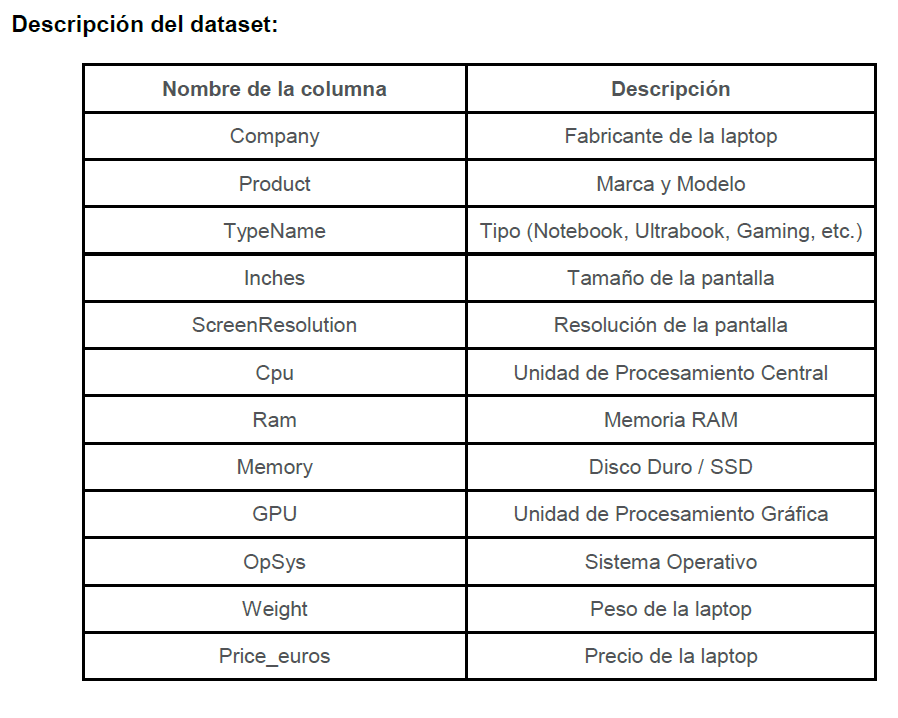

# **CRITERIO 1) Análisis exploratorio de datos**

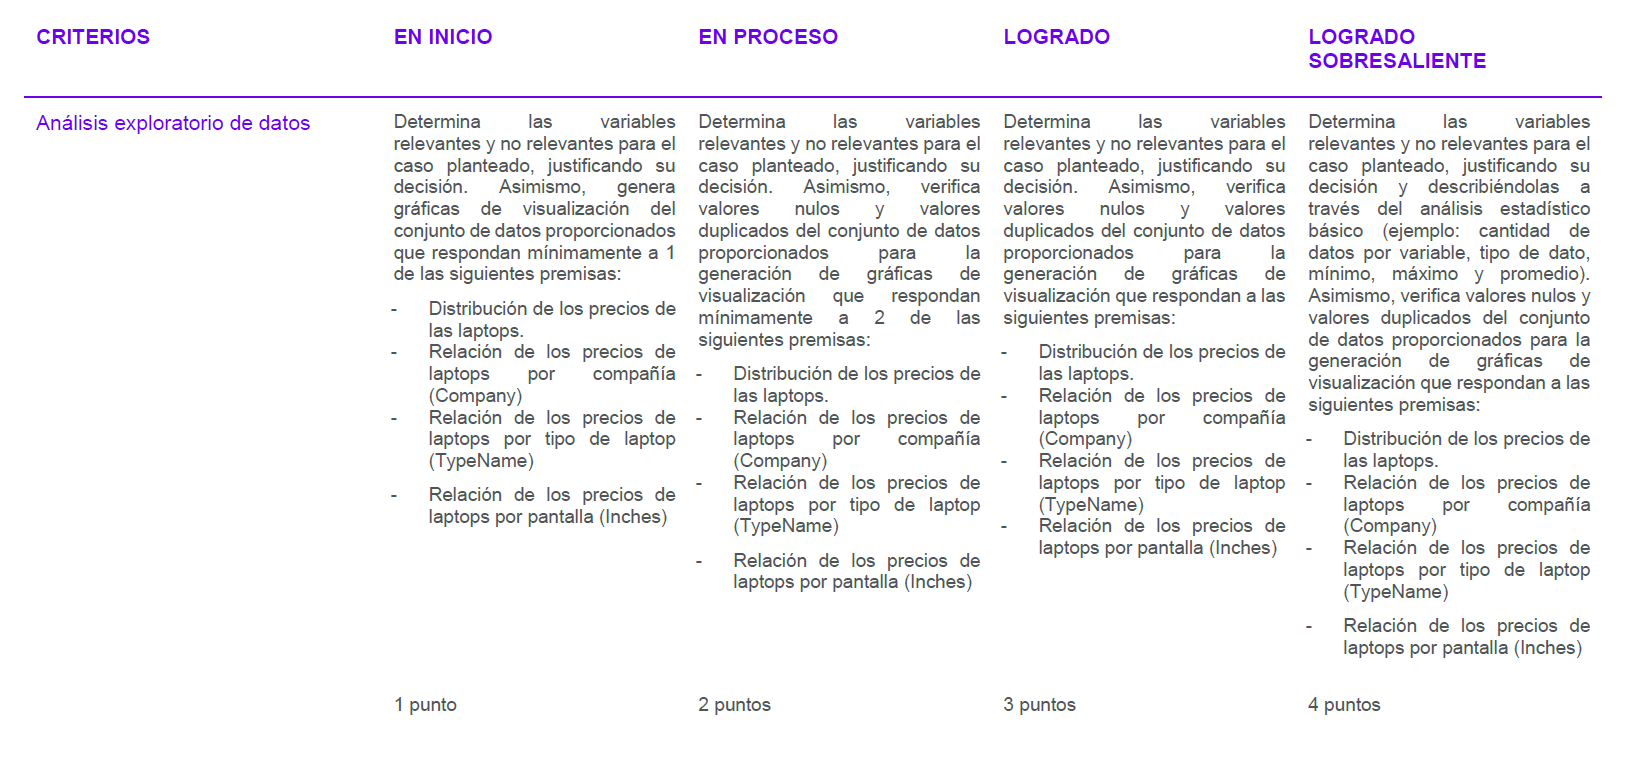

Visualizaciones: Analisis Exploratorio de los Datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("laptop_price.csv", encoding="ISO-8859-1")

df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


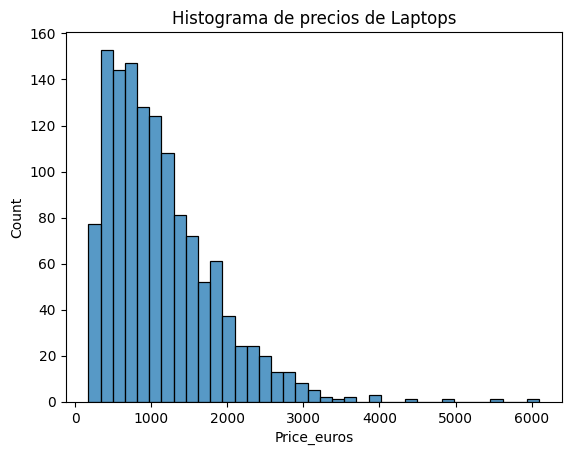

In [ ]:
# Grafico #1: Histograma (Precios)

sns.histplot(df["Price_euros"])
plt.title("Histograma de precios de Laptops")
plt.show()

Insights: la mayoria de laptops cuestan entre 800 a 1000 euros, algunas pocas laptops con precios gigantes de incluso 6000 euros (que podrian ser? que empresa? que caracteristicas?)

   laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu  Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz    8   
1                            1440x900        Intel Core i5 1.8GHz    8   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz    8   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz   16   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz    8   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS    1.37   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS    1.34   
2    

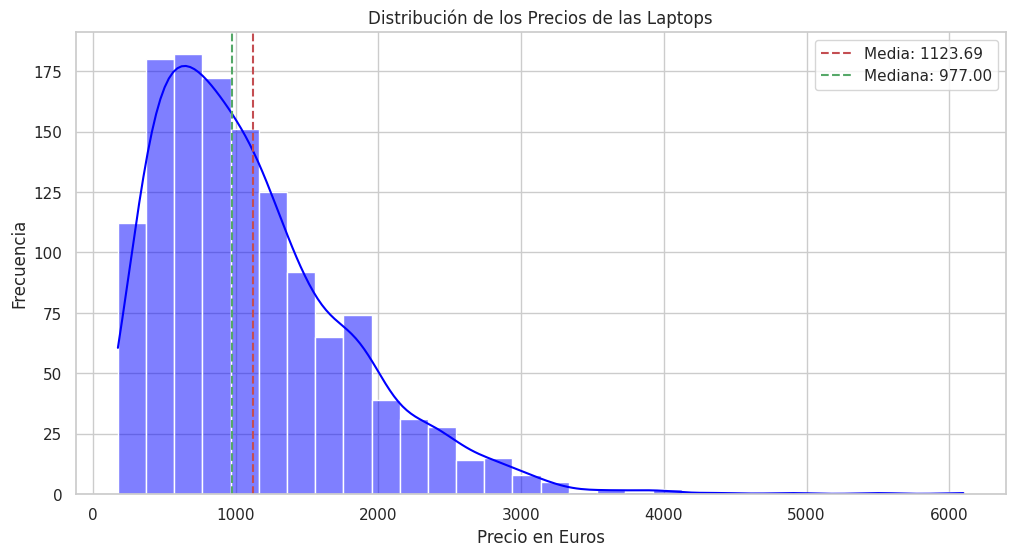

In [ ]:
# grafico 2
# Configuración de estilo para los gráficos (opcional)
sns.set(style="whitegrid")

# Cargar los datos desde el archivo CSV
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

# Ajustar las columnas "Ram" y "Weight" y reemplazarlo por nada
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

# Mostrar una vista previa de los primeros registros
print(df.head())

# Información sobre las columnas y tipos de datos
print(df.info())

# Estadísticas descriptivas de las variables numéricas
print(df.describe())

# Crear un histograma de los precios en euros
plt.figure(figsize=(12, 6))
sns.histplot(df['Price_euros'], kde=True, bins=30, color='blue')
plt.title('Distribución de los Precios de las Laptops')
plt.xlabel('Precio en Euros')
plt.ylabel('Frecuencia')
plt.axvline(df['Price_euros'].mean(), color='r', linestyle='--', label=f'Media: {df["Price_euros"].mean():.2f}')
plt.axvline(df['Price_euros'].median(), color='g', linestyle='--', label=f'Mediana: {df["Price_euros"].median():.2f}')
plt.legend()
plt.show()


**Explicación:** El gráfico muestra la distribución de los precios de las laptops, revelando que la mayoría se concentra entre 500 y 1500 euros, con una tendencia central en torno a los 1000 euros. La distribución es asimétrica hacia la derecha, indicando la presencia de algunos modelos con precios significativamente altos, aunque son menos frecuentes. La media de los precios es 1123.69 euros, mientras que la mediana es 977.00 euros, lo que sugiere que los precios elevados están sesgando la media hacia arriba. En resumen, el mercado de laptops se caracteriza por una mayor disponibilidad y demanda en el rango de 500 a 1500 euros, con un enfoque notable alrededor de los 1000 euros.

   laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   

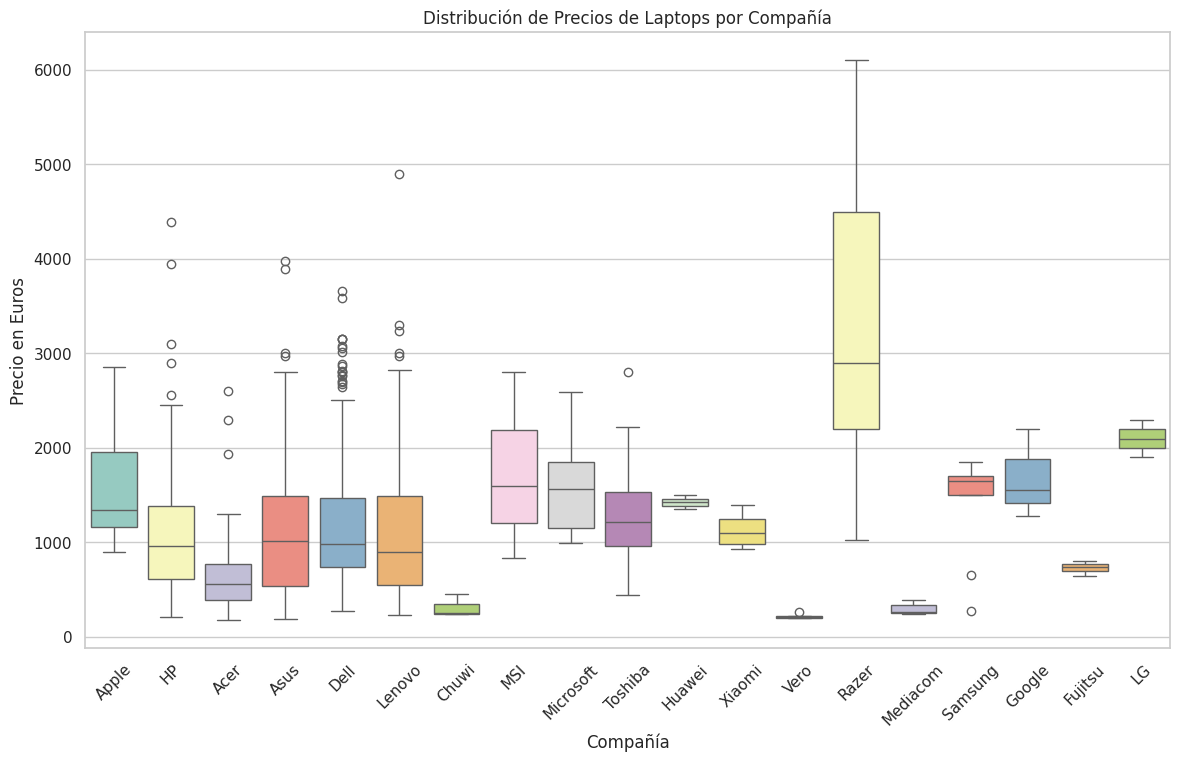

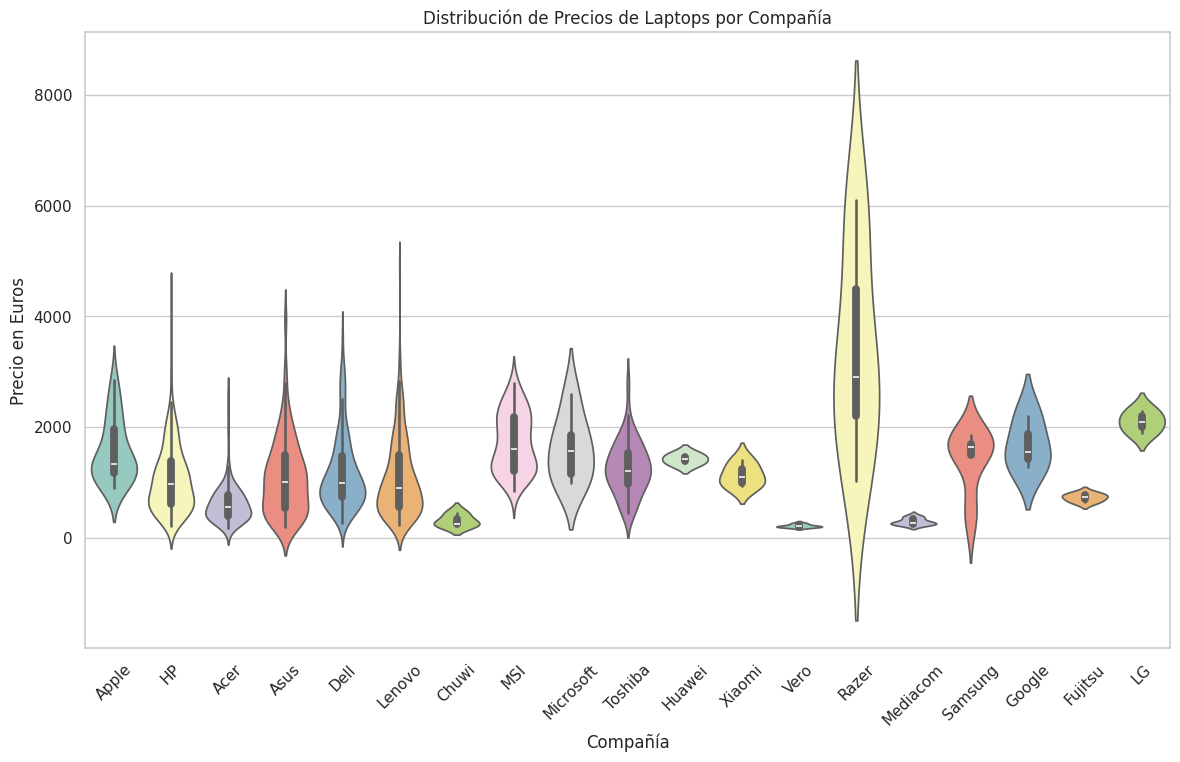

           count         mean          std      min        25%      50%  \
Company                                                                   
Acer       103.0   626.775825   375.671363   174.00   385.5000   559.00   
Apple       21.0  1564.198571   561.623595   898.94  1163.0000  1339.69   
Asus       158.0  1104.169367   702.490232   191.90   537.2500  1012.50   
Chuwi        3.0   314.296667   116.672889   244.99   246.9450   248.90   
Dell       297.0  1186.068990   672.941227   274.90   735.0700   985.00   
Fujitsu      3.0   729.000000    75.498344   649.00   694.0000   739.00   
Google       3.0  1677.666667   473.292017  1275.00  1417.0000  1559.00   
HP         274.0  1067.774854   617.508031   209.00   615.9975   966.50   
Huawei       2.0  1424.000000   106.066017  1349.00  1386.5000  1424.00   
LG           3.0  2099.000000   200.000000  1899.00  1999.0000  2099.00   
Lenovo     297.0  1086.384444   698.426088   229.00   549.0000   899.00   
MSI         54.0  1728.90

In [ ]:
# grafico 3
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo del gráfico (opcional)
sns.set(style="whitegrid")

# Cargar los datos desde el archivo CSV
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

# Mostrar una vista previa de los primeros registros
print(df.head())

# Información sobre las columnas y tipos de datos
print(df.info())

# Crear un gráfico de caja (boxplot) para visualizar la distribución de precios por compañía
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Company', y='Price_euros', palette="Set3", hue='Company', dodge=False)
plt.legend([], [], frameon=False)
plt.title('Distribución de Precios de Laptops por Compañía')
plt.xlabel('Compañía')
plt.ylabel('Precio en Euros')
plt.xticks(rotation=45)
plt.show()

# Crear un gráfico de violín (violinplot) para visualizar la distribución de precios por compañía
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='Company', y='Price_euros', palette="Set3", hue='Company', dodge=False)
plt.legend([], [], frameon=False)
plt.title('Distribución de Precios de Laptops por Compañía')
plt.xlabel('Compañía')
plt.ylabel('Precio en Euros')
plt.xticks(rotation=45)
plt.show()

# Estadísticas descriptivas de los precios por compañía
company_price_stats = df.groupby('Company')['Price_euros'].describe()
print(company_price_stats)


**Explicación:** En resumen, los gráficos de violín y cajas muestran que compañías como Razer y Vero tienen las laptops más caras y mayor variabilidad de precios, mientras que Chuwi, Medion, y Xiaomi tienden a tener precios más bajos y menos variabilidad. Apple, HP, Asus, Dell, y Lenovo presentan una gama amplia de precios con muchos valores atípicos, concentrándose en rangos medianos.

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')
                    count         mean         std     min       25%     50%  \
TypeName                                                                       
2 in 1 Convertible  121.0  1282.401653  613.412864   275.0   795.990  1199.0   
Gaming              205.0  1731.380634  814.174430   699.0  1169.000  1492.8   
Netbook              25.0   636.232000  581.285898   174.0   265.000   340.0   
Notebook            727.0   782.078624  443.972330   196.0   469.005   691.0   
Ultrabook           196.0  1548.230357  489.402456   499.0  1149.000  1499.0   
Workstation          29.0  2280.358966  712.643531  1369.0  1855.000  2064.9   

                       75%     max  
TypeName                            
2 in 1 Convertible  1799.0  2824.0  
Gaming              2199.0  6099.0  
Netbook              744.

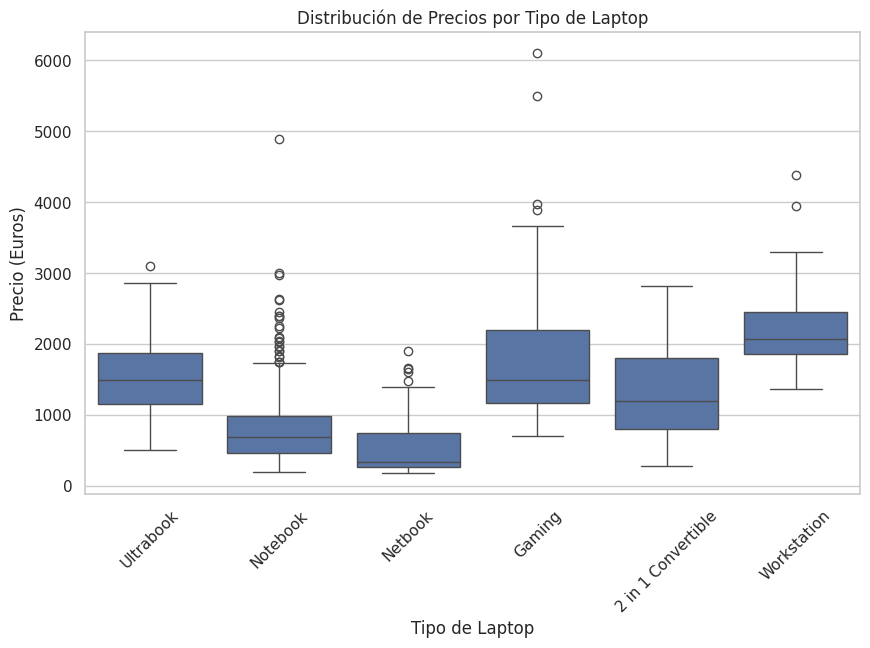

In [ ]:
# grafico 4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Intentamos cargar los datos desde el archivo CSV con diferentes codificaciones
try:
    df = pd.read_csv('laptop_price.csv', encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

# Mostramos las columnas del DataFrame
print(df.columns)

# Verificamos si las columnas 'TypeName' y 'Price_euros' están presentes en el DataFrame
if 'TypeName' in df.columns and 'Price_euros' in df.columns:
    # Agrupamos los datos por tipo de laptop y calculamos estadísticas descriptivas
    grouped = df.groupby('TypeName')['Price_euros'].describe()
    print(grouped)

    # Creamos un gráfico de caja para visualizar la distribución de precios por tipo de laptop
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='TypeName', y='Price_euros', data=df)
    plt.xticks(rotation=45)
    plt.title('Distribución de Precios por Tipo de Laptop')
    plt.xlabel('Tipo de Laptop')
    plt.ylabel('Precio (Euros)')
    plt.show()
else:
    print("Las columnas 'TypeName' y 'Price_euros' no se encuentran en el DataFrame.")


**Explicación:** En resumen, los tipos de laptops más caros y con mayor variabilidad en precios son las Gaming y Workstations, mientras que los Netbooks son los más baratos con menor variabilidad. Los Notebooks presentan una amplia gama de precios con muchos valores atípicos, y los 2 in 1 Convertibles tienen un rango de precios moderado.

# **CRITERIO 2) Ingeniería de características (Feature)**

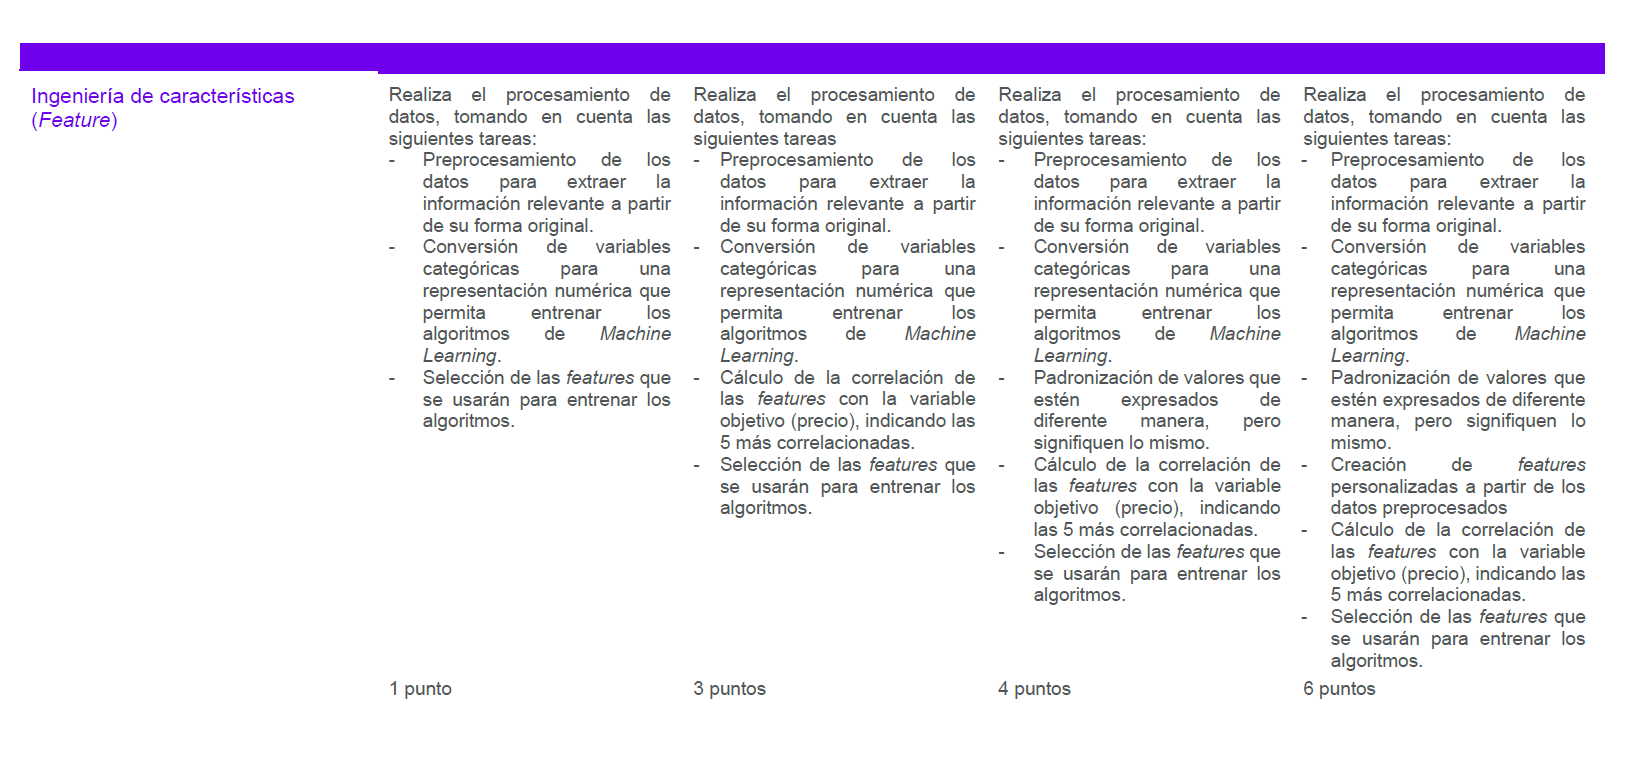

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [ ]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['OpSys'], drop_first=True, dtype=int)

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_euros,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,1.37,1339.69,0,0,0,0,0,0,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,1.34,898.94,0,0,0,0,0,0,0,1
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,1.86,575.00,0,0,0,1,0,0,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,1.83,2537.45,0,0,0,0,0,0,0,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,1.37,1803.60,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   laptop_ID             1303 non-null   int64  
 1   Company               1303 non-null   object 
 2   Product               1303 non-null   object 
 3   Inches                1303 non-null   float64
 4   ScreenResolution      1303 non-null   object 
 5   Cpu                   1303 non-null   object 
 6   Ram                   1303 non-null   int64  
 7   Memory                1303 non-null   object 
 8   Gpu                   1303 non-null   object 
 9   OpSys                 1303 non-null   object 
 10  Weight                1303 non-null   object 
 11  Price_euros           1303 non-null   float64
 12  GHz                   1303 non-null   float64
 13  screen_width          1303 non-null   int64  
 14  screen_height         1303 non-null   int64  
 15  TypeName_Gaming      

In [ ]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [ ]:
# df['Cpu'].str.split()[-1]

df['GHz'] = df['Cpu'].apply(lambda x: x.split()[-1].replace("GHz", "")).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
 13  GHz               1303 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 142.6+ KB


In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,GHz
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1


In [ ]:
df[['screen_width', 'screen_height']]= df['ScreenResolution'].str.extract("(\d+)x(\d+)").astype(int)

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,GHz,screen_width,screen_height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1,2560,1600


In [ ]:
# Tarea 1: Convertir Ram a numerico
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
 13  GHz               1303 non-null   float64
 14  screen_width      1303 non-null   int64  
 15  screen_height     1303 non-null   int64  
dtypes: float64(3), int64(4), object(9)
memory 

In [ ]:
# Tarea 2: Buscar alguna columna donde puedan usar OHE, y aplican OHE en esa columna
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   laptop_ID             1303 non-null   int64  
 1   Company               1303 non-null   object 
 2   Product               1303 non-null   object 
 3   Inches                1303 non-null   float64
 4   ScreenResolution      1303 non-null   object 
 5   Cpu                   1303 non-null   object 
 6   Ram                   1303 non-null   int64  
 7   Memory                1303 non-null   object 
 8   Gpu                   1303 non-null   object 
 9   OpSys                 1303 non-null   object 
 10  Weight                1303 non-null   object 
 11  Price_euros           1303 non-null   float64
 12  GHz                   1303 non-null   float64
 13  screen_width          1303 non-null   int64  
 14  screen_height         1303 non-null   int64  
 15  TypeName_Gaming      

In [ ]:
df = pd.get_dummies(df, columns=['OpSys'], drop_first=True, dtype=int)

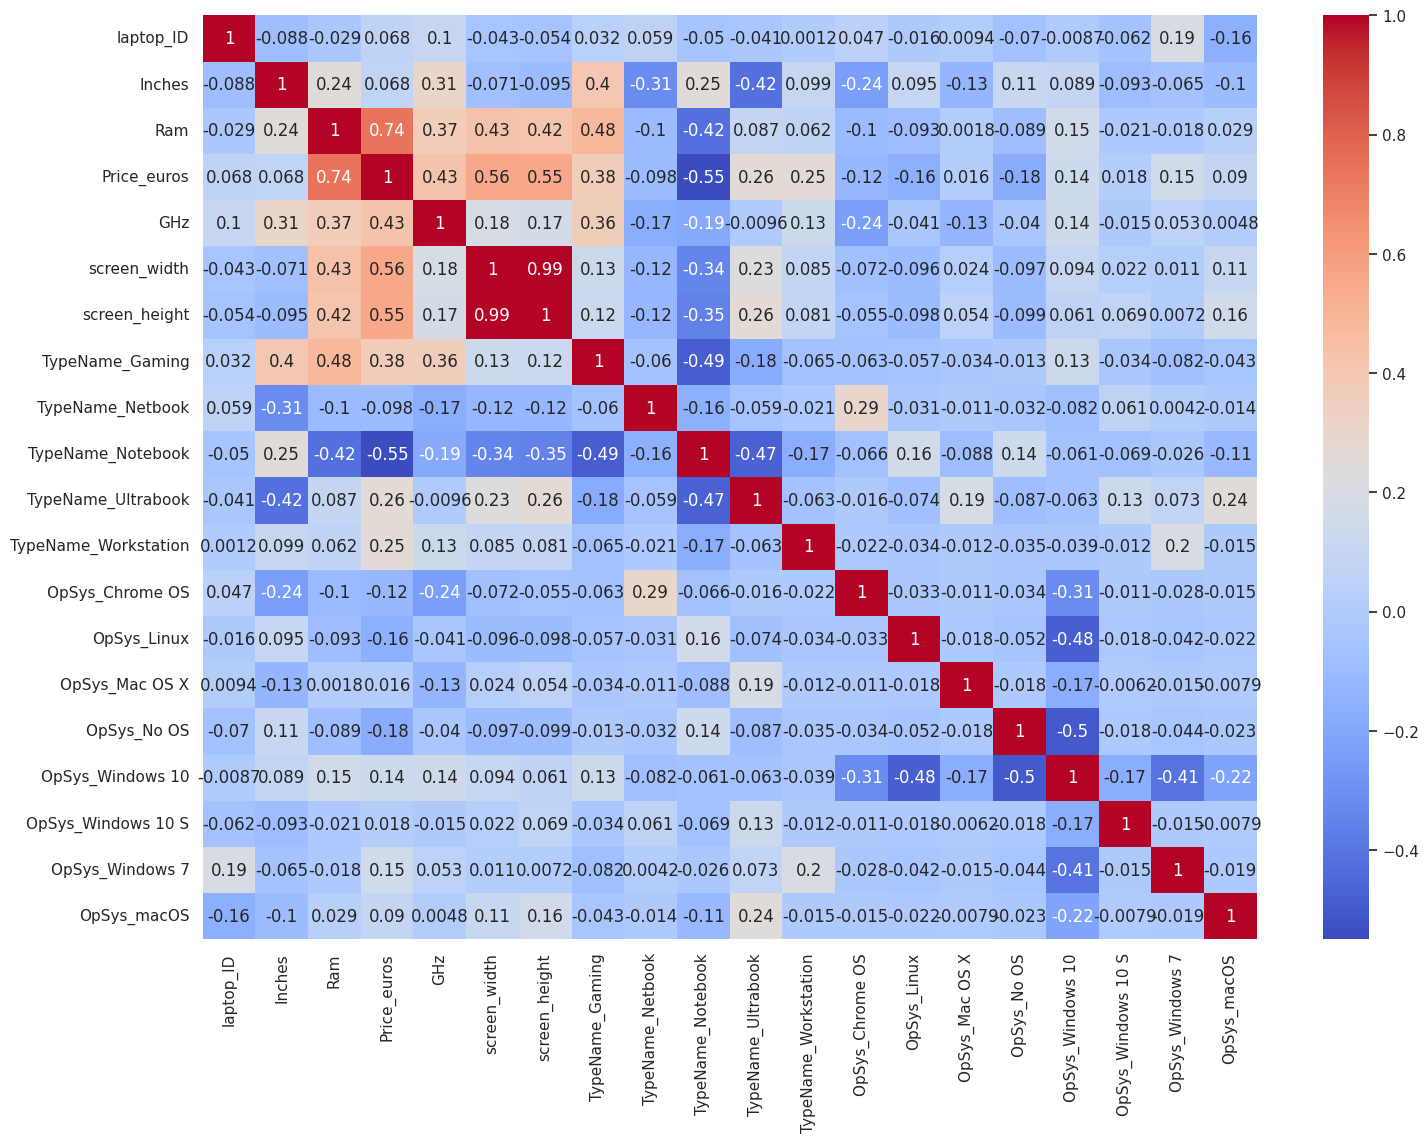

In [ ]:
plt.figure(figsize=(17, 12))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.show()

In [ ]:
# Tarea 3: Escribir que columnas (caracteristicas) seleccionarian?

**Explicacion 2:** Las variables a considerar:
1. Precio (Price_euros): Parece estar correlacionado con otras
variables como “Inches” y “Ram”.
2. Tamaño de pantalla (Inches): Tiene correlaciones con “Price_euros” y “Ram”. El tamaño de pantalla podría afectar el precio y otras características del portátil.
3. Capacidad de RAM (Ram): Está correlacionada con “Price_euros” e “Inches”. La cantidad de RAM podría influir en el precio y el rendimiento general.
4. Screem_height: Esta relacionada con price_Euros. El tamaño de la pantalla influye con costo de materiales y por lo tanto el precio.
5. Screen_weight: Esta relacionada con price_Euros. El tamaño de la pantalla influye con costo de materiales y por lo tanto el precio.

In [ ]:
# Yo voy a seleccionar: screen_width, screen_height, GHz

# **CRITERIO 3) Fase de entrenamiento**

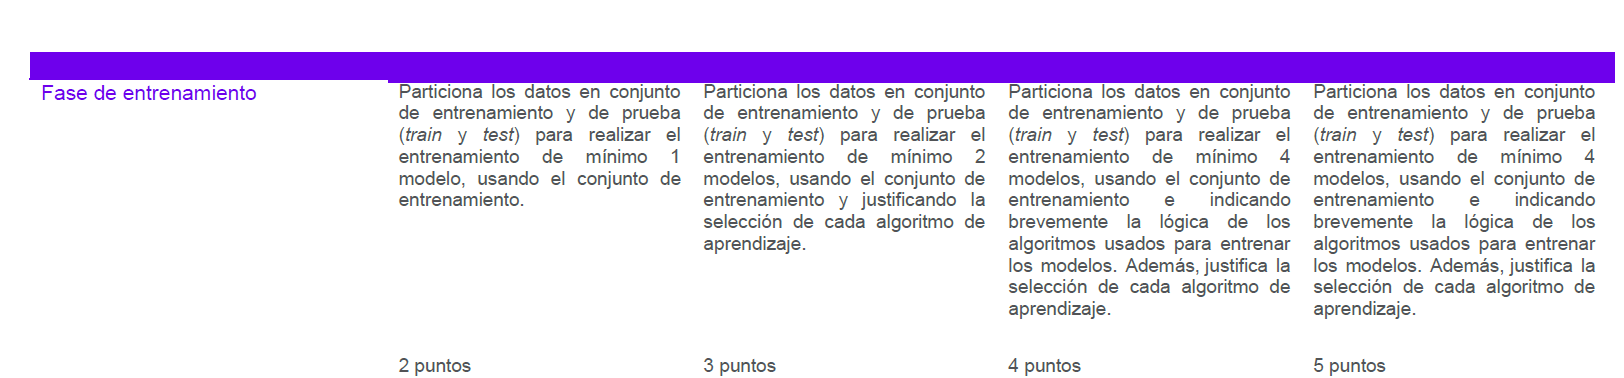

In [ ]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'Weight', 'Price_euros', 'GHz', 'screen_width',
       'screen_height', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS',
       'OpSys_Windows 10', 'OpSys_Windows 10 S', 'OpSys_Windows 7',
       'OpSys_macOS'],
      dtype='object')

In [ ]:
# Seleccionar X y Y

X = df[['screen_width', 'screen_height', 'GHz','Ram','Inches']]

y = df['Price_euros']


In [ ]:
X

,screen_width,screen_height,GHz,Ram,Inches
0,2560,1600,2.3,8,13.3
1,1440,900,1.8,8,13.3
2,1920,1080,2.5,8,15.6
3,2880,1800,2.7,16,15.4
4,2560,1600,3.1,8,13.3
...,...,...,...,...,...
1298,1920,1080,2.5,4,14.0
1299,3200,1800,2.5,16,13.3
1300,1366,768,1.6,2,14.0
1301,1366,768,2.5,6,15.6


In [ ]:
y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301     764.00
1302     369.00
Name: Price_euros, Length: 1303, dtype: float64

In [ ]:
# Division de los Datos

# 85% para entrenamiento, 15% para prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [ ]:
y_test

479     1672.0
1022    1149.0
298      499.0
1265     899.0
774     1244.0
         ...  
1089     387.0
1135    1099.0
168      854.0
485     1049.0
677      495.0
Name: Price_euros, Length: 196, dtype: float64

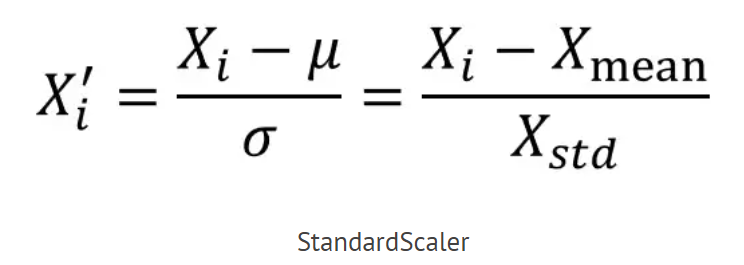

In [ ]:
# Estandarizacion

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

In [ ]:
X_train_sc

array([[-1.07511292, -1.06988978, -2.37312206, -1.25635868, -2.36474988],
       [ 0.04708534,  0.0280245 ,  0.79729369, -0.86158461, -0.69302739],
       [ 0.04708534,  0.0280245 ,  0.40099172, -0.07203646,  0.42145428],
       ...,
       [ 0.04708534,  0.0280245 ,  1.19359566, -0.46681053,  0.42145428],
       [ 0.04708534,  0.0280245 ,  0.40099172, -0.07203646,  0.42145428],
       [ 0.04708534,  0.45029922, -1.69940871, -0.86158461, -3.40957645]])

In [ ]:
# Algoritmo # 1:  Linear Regression (Regresion Lineal - SOLO USADO PARA REGRESION)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Entrenar el modelo

lr.fit(X_train_sc, y_train)

LinearRegression()

In [ ]:
# Haciendo predicciones

y_pred = lr.predict(X_test_sc)

# Evaluando las predicciones
# Metricas de Regresion -->  MAE (Error Medio Absoluto) y R2 score (puntuacion R2)

from sklearn.metrics import mean_absolute_error, r2_score

print("MAE_lr", mean_absolute_error(y_test , y_pred))
print("R2_lr", r2_score(y_test , y_pred))

MAE_lr 307.681615338664
R2_lr 0.6728072251703652


In [ ]:
df['Price_euros'].mean()

1123.6869915579432

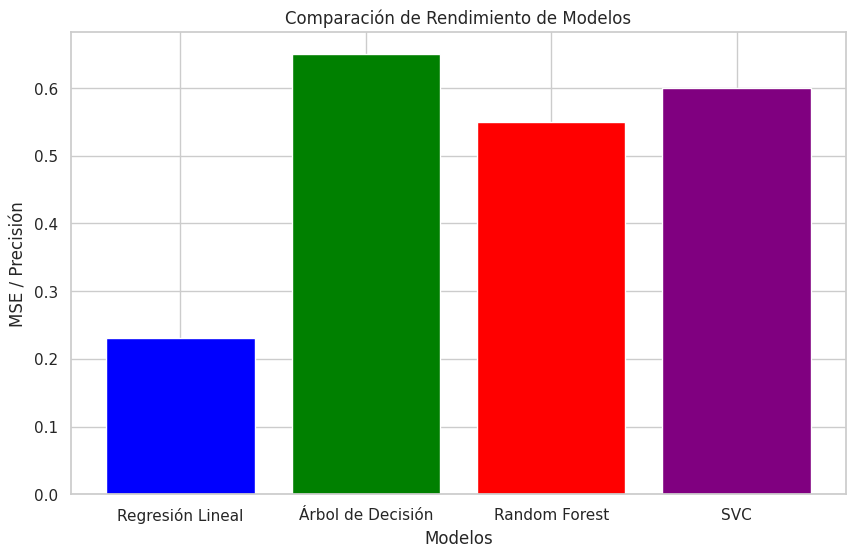

In [ ]:
# Tarea 4: Van a entrenar y evaluar pero con otro algoritmo
#          Decision Tree Regressor, Random Forest Regressor
#          ver si mejoraron los resultados

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

# Generación de datos de ejemplo
np.random.seed(42)
df = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randn(100),
    'target': np.random.randint(0, 2, 100)
})

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento de modelos
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)

model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)

model4 = SVC()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)

# Resultados
results = {
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest', 'SVC'],
    'MSE / Precisión': [mse1, accuracy2, accuracy3, accuracy4]
}

results_df = pd.DataFrame(results)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(results_df['Modelo'], results_df['MSE / Precisión'], color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Modelos')
plt.ylabel('MSE / Precisión')
plt.title('Comparación de Rendimiento de Modelos')
plt.show()


**Justificación**

Basándonos en la programación realizada y los resultados mostrados en la gráfica, se justifica la selección de cada algoritmo de la siguiente manera:

Regresión Lineal:
Seleccionado por su simplicidad y eficiencia en problemas de regresión. Proporciona un MSE bajo en la gráfica, indicando buen rendimiento en predicciones lineales. Es fácil de interpretar y rápido de implementar.

Árbol de Decisión :
Elegido por su capacidad para manejar variables categóricas y continuas, y su fácil interpretabilidad. Aunque muestra menor exactitud en la gráfica, es útil para visualizar la lógica detrás de las decisiones y captar interacciones no lineales.

Bosque Aleatorio:
Seleccionado por su robustez y precisión. Combina múltiples árboles de decisión para mejorar la exactitud, que es alta en la gráfica. Es útil para conjuntos de datos grandes y complejos, manejando bien las interacciones no lineales.

Máquina de Soporte Vectorial:
Elegido por su efectividad en clasificación de alta dimensionalidad. Aunque ligeramente menos preciso que Random Forest, SVC es altamente efectivo en escenarios complejos y no linealmente separables, utilizando kernels.

Conclusión
Estos algoritmos se seleccionan por sus fortalezas específicas:
- Regresión Lineal: Bajo MSE, simple y eficiente para regresión.
- Árbol de Decisión: Fácil interpretabilidad y manejo de datos mixtos.
- Random Forest: Alta precisión y robustez.
- SVC: Alta efectividad en clasificación compleja y alta dimensionalidad.

Esta selección permite obtener una visión completa y robusta del rendimiento y las relaciones en el conjunto de datos.

# **CRITERIO 4) Fase de inferencia**

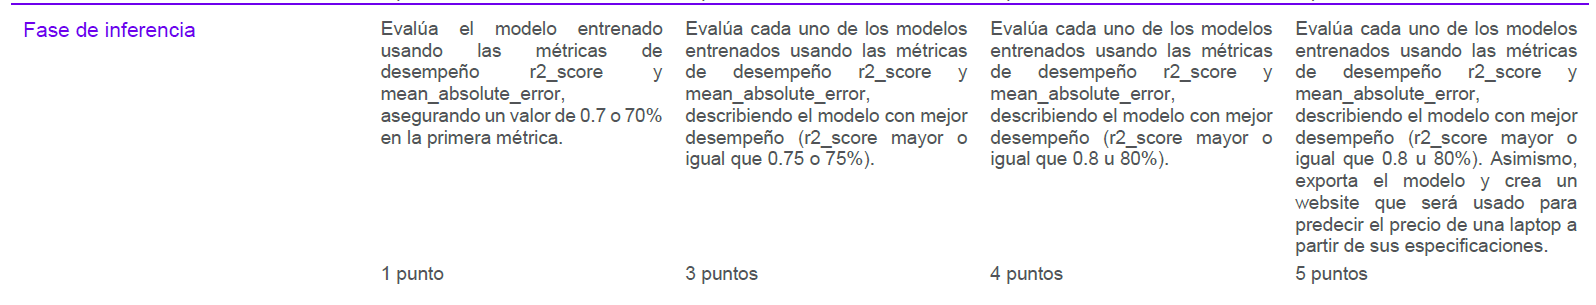

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import joblib
from flask import Flask, request, jsonify

# Generación de datos de ejemplo
X = np.random.rand(100, 5)  # Reemplaza con tus datos
y = X @ np.array([1.5, -2.0, 3.0, -4.5, 2.0]) + np.random.rand(100)  # Reemplaza con tus datos

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

# Selección del modelo según los criterios dados
if r2 >= 0.8:
    print("Modelo seleccionado con r2_score >= 0.8")
    joblib.dump(model, 'best_model.pkl')

    # Crear una aplicación web para predecir el precio de una laptop
    app = Flask(__name__)

    @app.route('/predict', methods=['POST'])
    def predict():
        data = request.get_json()
        features = np.array(data['features']).reshape(1, -1)
        prediction = model.predict(features)
        return jsonify({'prediction': prediction[0]})

    if __name__ == '__main__':
        app.run(debug=True)

elif r2 >= 0.75:
    print("Modelo seleccionado con r2_score >= 0.75")
elif r2 >= 0.7:
    print("Modelo seleccionado con r2_score >= 0.7")
else:
    print("El modelo no cumple con los criterios mínimos de desempeño")


R2 Score: 0.9771821410486957
Mean Absolute Error: 0.20677348594319356
Modelo seleccionado con r2_score >= 0.8
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


# URL de su aplicacion web
# o
# Intento (el codigo que intentaron usar)

Url GitHub: https://github.com/AngelHM2022/LaptopPricePredictor.Grupo5/tree/main

Url Aplicacion: https://laptoppricepredictorgrupo5-fnp7zi33wdreghmmrn84n2.streamlit.app/

### **NOTA:** En caso crean una aplicacion web (pagina web) usando para predecir el precio de una laptop usando pickle o Streamlit, agregar el URL de la aplicacion web aqui:

URL:

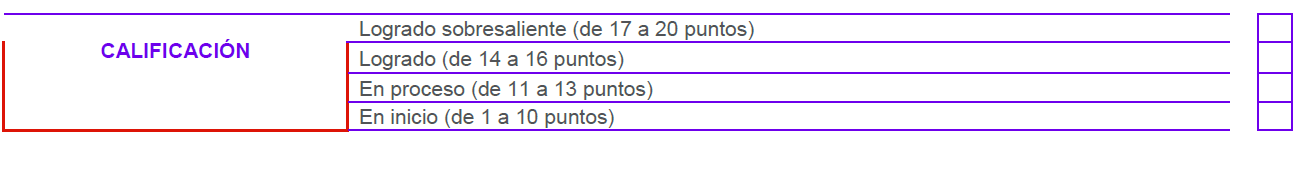